<a href="https://colab.research.google.com/github/ch23s020/Assignment1/blob/main/Copy_of_Copy_of_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import random
import pandas as pd

1.prepare data for n-dimensional input
2. passing this data to a sigmoid function---funct1
3. passing the ouyput of sigmoid into a softmax function to get the probability distri output---funct2
4. this will be y_hat
5. compare this y_hat with y-original(one hot vector)
6. for comaparison use of cross entropy(negative log-likelihood function)
7. calculate loss

Back Prop:-
1. calculate derivative of loss wrt y-hat
2. derivative of y-hat wrt funct2 (detailing of weight and preactivation at each layer use sirs slide)
3.funct2 wrt funct1
4. funct1 wrt to input weights

update:
1. use of gradient descent algo to update the w using the calculated dw(dl/dw)
2. pass the new w into forward prop again.

repeat:
1.repeat the same process for all data points (53999) for training purpose.

2.validate over validation data (54000 60000)

Set Up Wandb.

modification:-

1.Once done use other algorith for adam namdam sgd into main algorithm.
2. repaeat all procedure of running forward and back with added algo.

Finally push to wandb and see for correlation graph and other mentioned stuff in assignment.




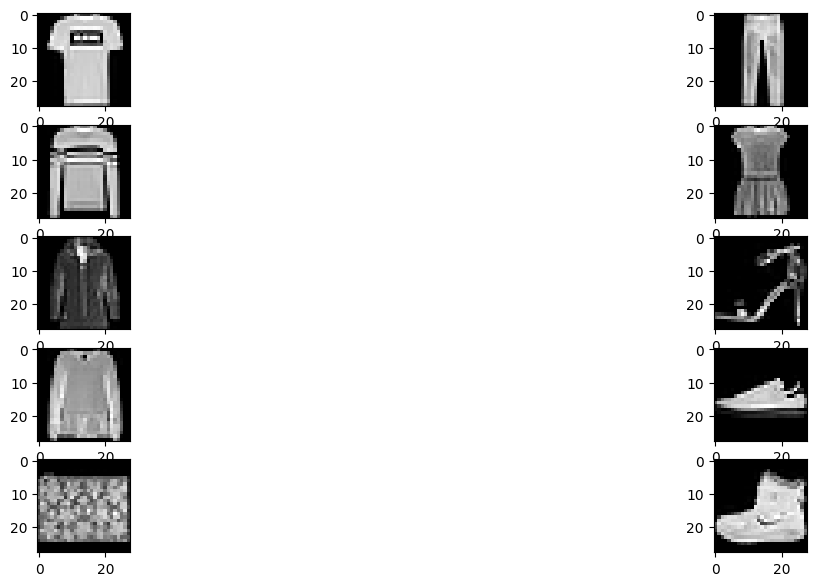

In [15]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data() # This data have 70k images of 28*28 in training set and 10k in test set(10% to keep aside)

fig, axs = plt.subplots (5,2, figsize=(16,7))

for i in range (5):
  for j in range (2):
    k = i*2 + j
    axs[i,j].imshow(x_train[y_train==k][0],cmap = 'gray')



#for i in range(10):
    #plt.subplot(5,2,i+1)
    #plt.imshow(x_train[i].reshape(28,28), cmap='gray')




Data Processing


In [17]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Reshaping the dataset from (60000 x 28 x 28 -----> 60000 x 784)
no_of_images, pixel_height, pixel_width = x_train.shape
x_train_rshp = x_train.reshape(no_of_images, pixel_height * pixel_width)
x_train_rshp = x_train_rshp.astype('float64') / 255.0

# Converting the labels to one-hot encoding
num_classes = 10
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

# Separating 10% data for validation purpose
partition = int(0.9 * len(x_train_rshp))
x_train_input, x_train_valid = x_train_rshp[:partition], x_train_rshp[partition:]
y_train_input, y_train_valid = y_train[:partition], y_train[partition:]

Activation Functions Class

In [18]:
class ActivationFunction:

    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))


    def softmax(self,x):
        exp_values = np.exp(x - np.max(x))
        return exp_values / np.sum(exp_values)

    def sigmoid_derivative(x):
      return sigmoid(x) * (1 - sigmoid(x))

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x <= 0, 0, 1)

    def tanh(self,x):
      return (np.exp(2*x)-1)/ (np.exp(2*x) +1)

    def tanh_derivative(x):
      return




Class Meta Neuron:-


In [19]:
# class fmnist_detecttion():
#   def __init__(self, input_size, hidden_size, output_size, activation='sigmoid'):
#     self.input_size = input_size
#     self.hidden_size = hidden_size
#     self.output_size = output_size
#     self.activation = activation
#     self.W1 = np.random.randn(self.input_size, self.hidden_size)
#     self.b1 = np.zeros((1, self.hidden_size))
#     self.W2 = np.random.randn(self.hidden_size, self.output_size)
#     self.b2 = np.zeros((1, self.output_size))


#   def sgd_update(self, dW1, db1, dW2, db2, eta):
#     self.W2 -= eta * dW2
#     self.b2 -= eta * db2
#     self.W1 -= eta * dW1
#     self.b1 -= eta * db1


#   def update_parameters(self, dW1, db1, dW2, db2, eta, optimizer, momentum=None, beta1=None, beta2=None, epsilon=None):
#     if optimizer == 'sgd':
#       self.sgd_update(dW1, db1, dW2, db2, eta)
#     elif optimizer == 'momentum':
#       self.momentum_update(dW1, db1, dW2, db2, eta, momentum)
#     elif optimizer == 'nesterov':
#       self.nesterov_update(dW1, db1, dW2, db2, eta, momentum)
#     elif optimizer == 'adam':
#       self.adam_update(dW1, db1, dW2, db2, eta, beta1, beta2, epsilon)
#     elif optimizer == 'nadam':
#       self.nadam_update(dW1, db1, dW2, db2, eta, beta1, beta2, epsilon)
# class meta_neuron():
#   def __init__(self, input, num_layers, hidden_size):
#     self.input = input
#     self.num_layers = num_layers
#     self.hidden_size = hidden_size
#     self.output_size = num_classes
#     self.input_size = pixel_height * pixel_width
#     self.activator = activation_function()

#     self.w1 = np.random.randn(self.input_size, self.hidden_size) * 0.05
#     self.b1 = np.zeros((1, self.hidden_size))

#   def weight_bias(self, output_size, hidden_size):
#     w_h = np.random.randn(output_size, hidden_size) * 0.05
#     b_h = np.zeros((1, self.hidden_size))
#     return w_h, b_h

#   def input_layer(self, idx):
#     output = np.dot(self.input[idx-1:idx], self.w1) + self.b1
#     return self.activator.sigmoid(output)

#   # for each hidden layer the variable hidden_size will be changing so, how wil I implement this into the code?
#   def hidden_layer(self, input, id):
#     w_h, b_h = self.weight_bias(len(input[0]), self.hidden_size)
#     output = np.dot(input, w_h) + b_h
#     return self.activator.sigmoid(output)

#   def output_layer(self, input):
#     w_o, b_o = self.weight_bias(len(input[0]), self.output_size)
#     output = np.dot(input, w_o) + b_o
#     return self.activator.softmax(output)

#   def forward_propogation(self):
#     num_imgs = 0
#     result = []
#     while(num_imgs != partition/1000):
#       current_layer = 2
#       op = self.input_layer(1)
#       while(current_layer != self.num_layers - 1):
#         op = self.hidden_layer(op, current_layer)
#         current_layer = current_layer + 1
#       op = self.output_layer(op)
#       result.append(op)
#     return result

# # input_size = pixel_height * pixel_width
# # hidden_size = 128

# # print(x_train_input[1:2] == x_train_input[1])

class MetaNeuron:
    def __init__(self, input_size, num_layers, hidden_size):
        self.input_size = input_size
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.output_size = num_classes
        self.activator = ActivationFunction()

        self.w1 = np.random.randn(self.input_size, self.hidden_size) * 0.05
        self.b1 = np.zeros((1, self.hidden_size))

    def weight_bias(self, output_size, hidden_size):
        w_h = np.random.randn(output_size, hidden_size) * 0.05
        b_h = np.zeros((1, hidden_size))
        return w_h, b_h

    def forward_propagation_batch(self, input_batch):
        activation = [input_batch]

        op = self.activator.sigmoid(np.dot(input_batch, self.w1) + self.b1)
        activation.append(op)

        for layer in range(2, self.num_layers):
            w_h, b_h = self.weight_bias(self.hidden_size, self.hidden_size)
            op = self.activator.sigmoid(np.dot(op, w_h) + b_h)
            activation.append(op)

        w_o, b_o = self.weight_bias(self.hidden_size, self.output_size)
        output = self.activator.softmax(np.dot(op, w_o) + b_o)
        activation.append(output)

        return output, activation


    def train(self, x_train, y_train, learning_rate, epochs, batch_size):
        for epoch in range(epochs):
            for i in range(0, len(x_train), batch_size):
                x_batch = x_train[i:i+batch_size]
                y_batch = y_train[i:i+batch_size]

                # Forward Propagation
                op, activations = self.forward_propagation_batch(x_batch)

                # Calculate Loss (you need to implement your specific loss function)
                loss = self.cross_entropy_loss(op, y_batch)

                # Backpropagation (you need to implement this part)
                # self.backpropagation(activations, op, y_batch, learning_rate)

                # Print or log the loss if needed
                print("Epoch : {}/{}".format(epoch + 1, epochs))
                print(f"Batch : {i//batch_size+1}/{len(x_train)//batch_size}")
                print("Loss  : {:.4f}\n".format(loss))

        print("Training complete.")

    def cross_entropy_loss(self, output, target):
      epsilon = 1e-15
      output = np.clip(output, epsilon, 1 - epsilon)
      # Calculate cross-entropy loss
      loss = -np.sum(target * np.log(output)) / len(output)
      return loss








Input to NN


In [20]:
# Set hyperparameters
hidden_size = 128
input_size = pixel_height * pixel_width
learning_rate = 0.01
epochs = 10
batch_size = 64

mn = MetaNeuron(input_size, 11, hidden_size)
mn.train(x_train_input, y_train_input, learning_rate, epochs, batch_size)

Streaming output truncated to the last 5000 lines.
Batch : 439/843
Loss  : 6.4294

Epoch : 9/10
Batch : 440/843
Loss  : 6.4383

Epoch : 9/10
Batch : 441/843
Loss  : 6.4125

Epoch : 9/10
Batch : 442/843
Loss  : 6.4777

Epoch : 9/10
Batch : 443/843
Loss  : 6.4866

Epoch : 9/10
Batch : 444/843
Loss  : 6.4906

Epoch : 9/10
Batch : 445/843
Loss  : 6.4943

Epoch : 9/10
Batch : 446/843
Loss  : 6.6171

Epoch : 9/10
Batch : 447/843
Loss  : 6.4965

Epoch : 9/10
Batch : 448/843
Loss  : 6.4232

Epoch : 9/10
Batch : 449/843
Loss  : 6.4571

Epoch : 9/10
Batch : 450/843
Loss  : 6.5344

Epoch : 9/10
Batch : 451/843
Loss  : 6.5221

Epoch : 9/10
Batch : 452/843
Loss  : 6.5117

Epoch : 9/10
Batch : 453/843
Loss  : 6.5097

Epoch : 9/10
Batch : 454/843
Loss  : 6.4862

Epoch : 9/10
Batch : 455/843
Loss  : 6.4520

Epoch : 9/10
Batch : 456/843
Loss  : 6.4979

Epoch : 9/10
Batch : 457/843
Loss  : 6.4420

Epoch : 9/10
Batch : 458/843
Loss  : 6.4532

Epoch : 9/10
Batch : 459/843
Loss  : 6.4626

Epoch : 9/10
Batc

In [21]:
# def sigmoid(x):
#   return 1 / (1 + np.exp(-x))


# def softmax(x):
#   exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
#   return exp_values / np.sum(exp_values, axis=1, keepdims=True)

# def calculate_loss(self, y_true, y_pred):
#   m = y_true.shape[0]
#   return -np.sum(y_true * np.log(y_pred + 1e-8)) / m

# def sigmoid_derivative(x):
#   return sigmoid(x) * (1 - sigmoid(x))

# def relu(self, x):
#   return np.maximum(0, x)

# def relu_derivative(self, x):
#   return np.where(x <= 0, 0, 1)

# def tanh(self,x):
#   return (np.exp(2*x)-1)/ (np.exp(2*x) +1)

# def tanh_derivative(x):
#   return
# # def categorical_crossentropy_derivative(y_true, y_pred):
# #     return -(y_true / (y_pred + 1e-10)) / len(y_true)


In [24]:
# defining parameters for initialization

# w = random.rand(784,10)
# b = random.rand(1,10)
# eta = 0.1
# epoch = 1000

# def grad_b(x,w,b,y):
#   fx = sigmoid(x,w,b)
#   return (fx-y)*fx*(1-fx)

# def grad_w(x,w,b,y):
#   fx = sigmoid(x,w,b)
#   return (fx-y)*fx*(1-fx)*x

# def gradient_descent():
#   for i in range (epoch):
#     dw=0;db=0
    # for x,y in zip(x_input_train_b, y_input_train_b):
    #   dw = dw + grad_w(x,w,b,y)
    #   db = db + grad_w(x,w,b,y)
    #   w = w - eta*dw
    #   b = b- eta *db

